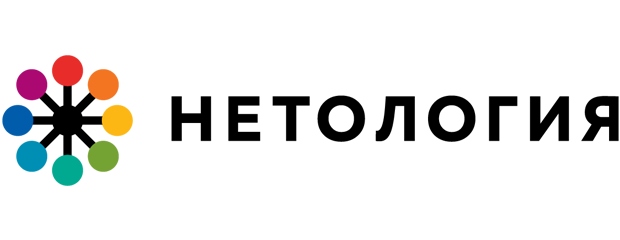

In [6]:
from IPython.display import Image
import numpy as np
import pandas as pd
import scipy.stats

import numpy as np

Image("netology-logo.png")

In [7]:
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)
    return m-h,m, m+h#,h

a = [5,7,7,9,10,16,7,14,13,15,16,15,16,17,18,13,14,15,6,13]


print(mean_confidence_interval(a, 0.95))
 

(10.391179971291619, 12.3, 14.208820028708383)


# Выборы в президенты или зачем нам доверительные интерваллы?!

In [8]:
Image("votting_usa.png")

FileNotFoundError: No such file or directory: 'votting_usa.png'

FileNotFoundError: No such file or directory: 'votting_usa.png'

<IPython.core.display.Image object>

In [9]:
df = pd.read_csv('2012_US_elect_county.csv', sep=',') # Откроем датасет
df.dropna(how='any',inplace=True)  #Удалим пустые значения
df=df[df['%']!='#DIV/0!'][['State Postal','County Name','%']] #Удалим мусор из данных и оставим только нужное
df['%'] = df['%'].astype(float) # Приведем к численному значению результаты голосования

Среднее по всей выборке:  44.07946954813346


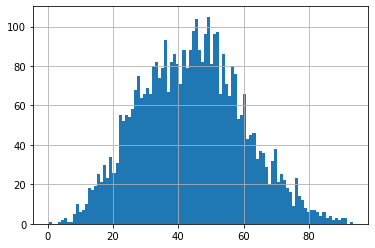

In [10]:
df['%'].hist(bins=100)
print('Среднее по всей выборке: ',df['%'].mean())

In [11]:
some_states_1= ['AK','OH','WV','ME','CA','MD']
some_states_2 = ['WA','AK','DE']
some_states_3 = ['AZ','RI','MA']



sub_df = df.loc[df['State Postal'].isin(some_states_2)]  # Выборка по нескольким штатам
l,s,r=mean_confidence_interval(sub_df['%'], 0.95)
l,s,r

(43.08121379244101, 46.23478260869564, 49.388351424950265)

In [12]:
#df['State Postal'].value_counts()  Расскоментить, если интересно соотношение штатов. 

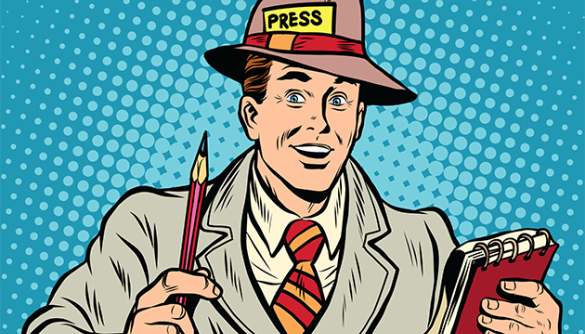

In [13]:
Image("ArticleImage.png")

### Расмотрим теперь другой пример. Допустим, вы журнались и оказались в 2016 году в предверии выборов презедента в США и хотите по результатам своих исследований достаточно точно определить, кто победит на этих выборах. Сколько вам необходимо опросить людей, чтобы назвать будущего президента с точность в 95%???

95%. Результаты предшествующих исследований свидетельствуют, что стандартное отклонение генеральной совокупности приближенно равно 25 долл. Таким образом, е = 5, σ = 25 и Z = 1,96

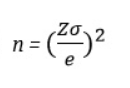

In [14]:
Image("formuls.png")

In [15]:
sigma = 15
Z = 1.96  # 95%
e = 5 #%

N = ((sigma*Z)/e)**2
N

 

34.5744

# Проверим:

Стандартное отклонение:  15.742396788859033
Среднее:  44.07946954813346


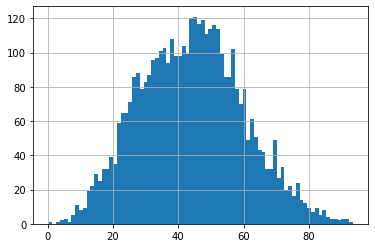

In [16]:
df = df['%']
print('Стандартное отклонение: ',df.std())
print('Среднее: ',df.mean())
df.hist(bins=80)

In [17]:
MEAN = df.sample(n = int(N)).mean()  # Возьмем выборку из случайных n значений
print('Среднее выборки: ', MEAN)
print('Среднее генеральной совокупности: ',df.mean())
MEAN-e, MEAN+e 

Среднее выборки:  41.96470588235294
Среднее генеральной совокупности:  44.07946954813346


(36.96470588235294, 46.96470588235294)

In [18]:
# from scipy.stats import norm
# norm.ppf(0.95, loc=0, scale=1)


In [19]:
#Test with sample with identical means:

In [20]:
from scipy import stats
np.random.seed(12345678)
 
rvs1 = stats.norm.rvs(loc=50,scale=10,size=500)
rvs2 = stats.norm.rvs(loc=49,scale=10, size=1500)

stats.ttest_ind(rvs1,rvs2)
 
# stats.ttest_ind(rvs1,rvs2, equal_var = False)
#pd.DataFrame(rvs1).hist()
#pd.DataFrame(rvs2).hist()

Ttest_indResult(statistic=2.3222628424612353, pvalue=0.02031882732222445)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FCD82B90D0>]],
      dtype=object)

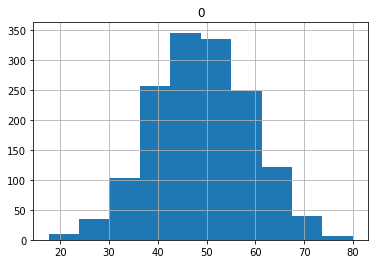

In [21]:
pd.DataFrame(rvs2).hist()

# Проверка гипотез

### t-Тест Стьюдента

In [22]:
 from scipy import stats


## Определим 2 случайных распределения
N = 10  #Размер выборок


b = np.random.randn(N) #Нормальное распределение с mean = 0 and var = 1
a = np.random.randn(N) + 1.5 #Нормальное распределение с mean = 2 and var = 1
 
### мы получаем хорошее значение p, равное 0,0005, и, таким образом, мы отклоняем нулевую гипотезу и, таким образом,
### это доказывает, что средние значения двух распределений различны и различие статистически значимо.
 
t , p  = stats.ttest_ind(a,b)
print("t = " + str(t))
print("p = " + str(p))

# A large t-score tells you that the groups are different.
# A small t-score tells you that the groups are similar.

t = 3.402858069696451
p = 0.0031713708603284094


# a. One-sample T-test with Python

Давайте попробуем это на одном образце. Тест покажет нам, отличаются ли средние значения выборки и генеральной совокупности. Рассмотрим количество голосующих в Индии и население всего Мира. Отличается ли средний возраст избирателей Индии от возраста населения? Давай выясним.

In [23]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
 
np.random.seed(6) 
population_ages1=stats.norm.rvs(loc=18,scale=45,size=150000)  #Мир
population_ages2=stats.norm.rvs(loc=18,scale=10,size=100000)
population_ages=np.concatenate((population_ages1,population_ages2))


india_ages1=stats.norm.rvs(loc=18,scale=45,size=3000)  # Индия
india_ages2=stats.norm.rvs(loc=18,scale=35,size=3000)
india_ages=np.concatenate((india_ages1,india_ages2))
population_ages.mean()


17.962669794272227

In [24]:
india_ages.mean()


18.894017967980226

In [25]:
stats.ttest_1samp(a=india_ages,popmean=population_ages.mean())
#Теперь это значение 1.807 говорит нам, насколько отклоняется выборочное среднее от нулевой гипотезы.

Ttest_1sampResult(statistic=1.8078631548305495, pvalue=0.07067786473788343)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FCD8BCC1F0>]],
      dtype=object)

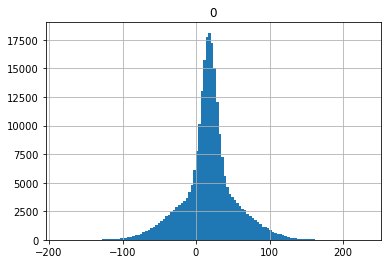

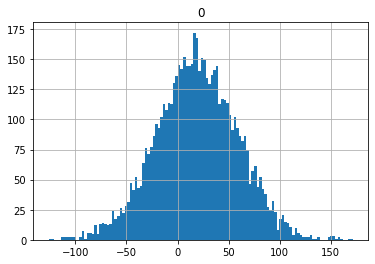

In [26]:
pd.DataFrame(population_ages).hist(bins=120)
pd.DataFrame(india_ages).hist(bins=120)

# b. Two-sample T-test With Python

Такой тест показывает, имеют ли две выборки данных разные средние значения. Здесь мы принимаем нулевую гипотезу о том, что обе группы имеют равные средние. Для этого нам не нужен известный параметр численности.

NameError: name 'aharashtra_ages' is not defined

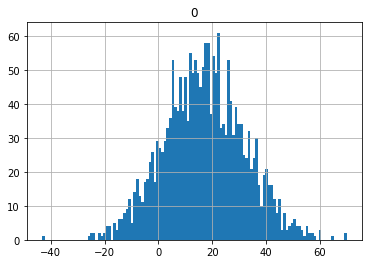

In [71]:
np.random.seed(12)
maharashtra_ages1=stats.norm.rvs(loc=17,scale=5,size=3000)
maharashtra_ages2=stats.norm.rvs(loc=17,scale=15,size=2000)
pd.DataFrame(maharashtra_ages2).hist(bins=120)

maharashtra_ages=np.concatenate((maharashtra_ages1,maharashtra_ages2))
maharashtra_ages.mean()
pd.DataFrame(maharashtra_ages).hist(bins=120)

In [68]:
stats.ttest_ind(a=india_ages,b=maharashtra_ages,equal_var=False)
#The value of 0.152 tells us there’s a 15.2% chance that the sample data is such far apart 
#for two identical groups. This is greater than the 5% confidence level.


#Значение 0,152 говорит о том, что существует вероятность 7,2% того, что выборочные данные для двух 
#идентичных групп сильно различаются. Это больше, чем уровень достоверности 5%.

NameError: name 'maharashtra_ages' is not defined

NameError: name 'maharashtra_ages' is not defined

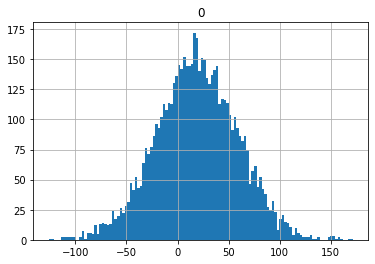

In [28]:
pd.DataFrame(india_ages).hist(bins=120)
pd.DataFrame(maharashtra_ages).hist(bins=120)

# c. Paired T-test With Python

T-критерий парной выборки, иногда называемый t-критерием зависимой выборки, представляет собой статистическую процедуру, используемую для определения того, равна ли нулю средняя разница между двумя наборами наблюдений. В парном выборочном t-тесте каждый субъект или объект измеряется дважды, в результате чего получаются пары наблюдений. Общие применения парного t-критерия выборки включают исследования случай-контроль или планы повторных измерений. 

Предположим, вас интересует оценка эффективности программы обучения компании. Один из подходов, который вы можете рассмотреть, - это измерение производительности выборки сотрудников до и после завершения программы и анализ различий с использованием парного выборочного t-критерия.

In [29]:
np.random.seed(11)
before=stats.norm.rvs(scale=30,loc=250,size=100)
after=before+stats.norm.rvs(scale=5,loc=-1.25,size=100)
weight_df=pd.DataFrame({"weight_before":before,
                         "weight_after":after,
                         "weight_change":after-before})
weight_df.describe()

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,250.345546,249.115171,-1.230375
std,28.132539,28.422183,4.783696
min,170.400443,165.913930,-11.495286
25%,230.421042,229.148236,-4.046211
50%,250.830805,251.134089,-1.413463
75%,270.637145,268.927258,1.738673
max,314.700233,316.720357,9.759282


In [30]:
stats.ttest_rel(a=before,b=after)
# Итак, мы видим, что у нас есть только 1% шансов найти такие огромные различия между образцами.

Ttest_relResult(statistic=2.5720175998568284, pvalue=0.011596444318439857)

# Практическое применение t-Тест Стьюдента

Представим, что вы следователь какой-то крупной рекламной компаннии. 
Ваша задача иследовать рыннок манго в течени последних нескольких лет.
У вас уже есть предварительные данные. Ваши подчиненные решили схалтурить и принести вам совсем другие отчеты. 
Сможели ли вы их разоблачить с помощью t-Тест Стьюдента и уволить?

In [31]:
Image("prof_redaktor.jpg")

FileNotFoundError: No such file or directory: 'prof_redaktor.jpg'

FileNotFoundError: No such file or directory: 'prof_redaktor.jpg'

<IPython.core.display.Image object>

In [32]:
df1 = pd.read_csv('avocado.csv', sep=',', index_col=0).AveragePrice[:1000]
df2 = pd.read_csv('StudentsPerformance.csv', sep=',', index_col=0)['math score']
 
t, p = stats.ttest_ind(df1 ,df2)
t,p

(-135.56983375430264, 0.0)

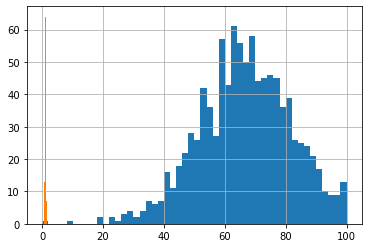

In [33]:
# и действительно выборки пренадлежать разным распределениям
df2.hist(bins=50)
df1.hist(bins=50)

# $Хи^{2}-  Пирсона$

In [34]:
 
import scipy as sp

# Сгенерируем случайную матрицу 2х2
X = np.random.randint(2, size=50).reshape(10, 5)
y = np.random.randint(2, size=10) 
contingency_table = sp.sparse.coo_matrix( (np.ones_like(y), (X[:, 0], y)),    
                                         shape=(np.unique(X[:, 0]).shape[0], 
                                                np.unique(y).shape[0])).A


print(contingency_table)
chi2, p, do,expected =  sp.stats.chi2_contingency(contingency_table)

print(chi2, p, do)

print(expected)

# Возвращает:
# chi2 : The test statistic.
# p : The p-value of the test
# dof : Degrees of freedom
# expected : Ожидаемые частоты, основанные на предельных суммах таблицы.

[[3 2]
 [2 3]]
0.0 1.0 1
[[2.5 2.5]
 [2.5 2.5]]


In [35]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency

table = [[10, 20, 30],[6,  9,  17]]
print(np.array(table))
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

[[10 20 30]
 [ 6  9 17]]
stat=0.272, p=0.873
Probably independent


In [36]:
subjects = pd.DataFrame(
    [
        [25,46,15],
        [15,44,15],
        [10,10,20]
    ],
    index=['Biology','Chemistry','Physics'],
    columns=['Math SL AA','Math SL AI','Math HL'])
subjects

,Math SL AA,Math SL AI,Math HL
Biology,25,46,15
Chemistry,15,44,15
Physics,10,10,20


Если рассчитанный хи-квадрат больше критического значения, мы отклоняем нулевую гипотезу.

In [37]:
chi, pval, dof, exp = scipy.stats.chi2_contingency(subjects) #  
print('p-value is: ', pval)
significance = 0.05
p = 1 - significance
critical_value = scipy.stats.chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))



if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
        They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
        They are independent.""" % (significance))

p-value is:  0.0004176680832291999
chi=20.392835, critical value=9.487729

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
        They are not independent.


В качестве альтернативы мы можем сравнить p-значение и уровень значимости. Если значение p <уровня значимости, мы отклоняем нулевую гипотезу.

In [38]:
chi, pval, dof, exp = scipy.stats.chi2_contingency(subjects)
significance = 0.05
print('p-value=%.6f, significance=%.2f\n' % (pval, significance))


if pval < significance:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
            They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
            They are independent.""" % (significance))

p-value=0.000418, significance=0.05

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
            They are not independent.


# точный критерий Фишера 

In [39]:
import scipy as sp

x = [[107,93],[74,45]]
 
oddsratio, pvalue = sp.stats.fisher_exact(x)
pvalue

0.1607594221528123

# Проанализируем теперь рынок жилья в New York City

New York City Airbnb Open Data
Airbnb listings and metrics in NYC, NY, USA (2019)

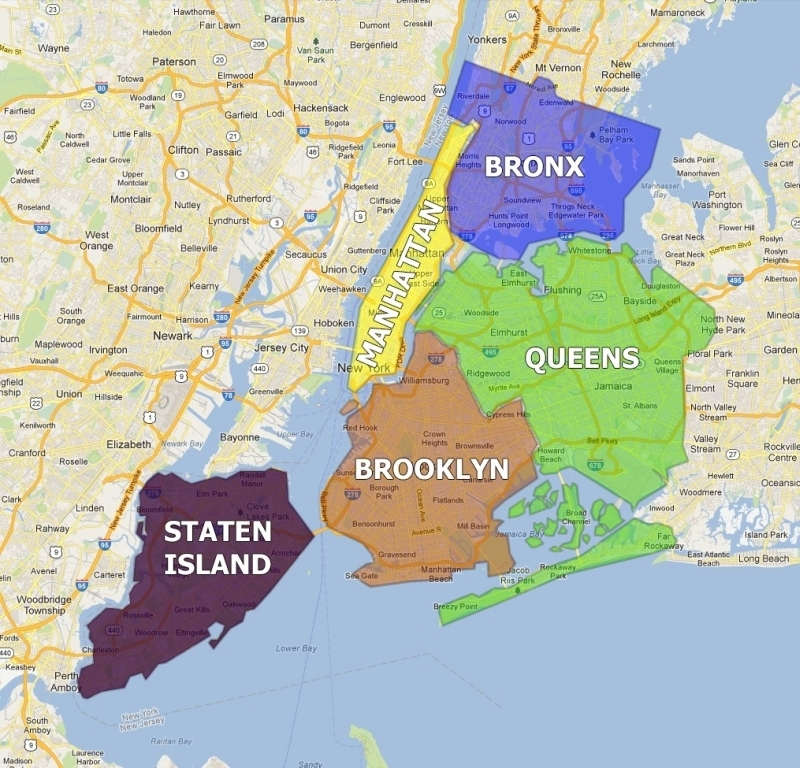

In [40]:
Image("BARRIOS_NY.jpg")

In [41]:
df = pd.read_csv('AB_NYC_2019.csv')
df.dropna(how='any',inplace=True)
df.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [42]:
# df.neighbourhood_group.hist()

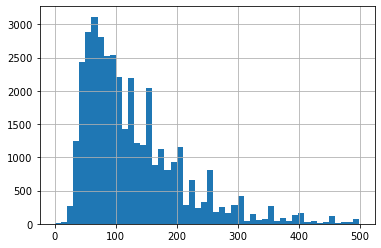

In [43]:
df[df.price<500].price.hist(bins=50)

In [44]:
print(df[df.price<400].price.mean())

df = pd.read_csv('AB_NYC_2019.csv')
df.dropna(how='any',inplace=True)

data = df[(df.neighbourhood_group == 'Brooklyn') | (df.neighbourhood_group=='Staten Island') | (df.neighbourhood_group=='Queens')].price

mean_confidence_interval(data, confidence=0.95) # Возможно вам понадобиться эта функция.

122.56345677697612


(113.2274769237582, 115.49388042203987, 117.76028392032153)

# Задания для самостоятельного решения


1. Найдите минимально необходимый объем выборки для построения интервальной оценки среднего с точностью ∆ = 3, дисперсией σ^2 = 225 и уровнем доверия β = 0.95.
# Так из лекции и не понял , где искать Zальфа 

In [73]:
sig = 3
σ_2 = 225 
β = 0.95
sigma = 15
Z = 1.96  # 95%

n = ((  σ_2 * Z)/ sig )**2
n

 

21609.0

2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

In [74]:
import scipy.stats as stats

population_men  =stats.norm.rvs(loc=19,scale=171,size=11000000)  # Выборка мужчин со средним ростом 171
population_women=stats.norm.rvs(loc=16,scale=165,size=12000)  # Выборка женщин со средним ростом 165
t , p  = stats.ttest_ind(population_men, population_women)
print("t = " + str(t))
print("p = " + str(p))
### они принадлежат разым выборкам 

t = 1.9965185751426853
p = 0.04587753051134086


3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

In [75]:
σ_2 = 150 
β = 0.95
delta = 25
Z = 1.96  
n = ((  σ_2 * Z)/ delta )**2
round(n)

138

4.  Представьте, что вы хотите разоблачить "волшебника", который считает, что умеет предсказывать погоду на завтра. Отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого периода времени и получили такие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду, 
если уровнь значимости принять за 0.05 ?

In [76]:
observations = pd.DataFrame([[25,36],[15,44]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,25,36
Солнце,15,44


In [77]:
import scipy as sp
oddsratio, pvalue = sp.stats.fisher_exact(observations, alternative='two-sided')  # Возможно вам пригодится эта функция.
print(oddsratio, pvalue)
### Он обманывает 

2.037037037037037 0.08323639416753109


5. Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия 90% для выборки: data = [1,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5]


In [78]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
def mean_confidence_interval(data, confidence=0.90):
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)
    return m-h,m, m+h#,h

print(mean_confidence_interval(data, 0.90))


(6.074074746111319, 6.628571428571429, 7.183068111031539)


6. Принадлежит ли выборка data_1 и data_2 одному множеству? Оцените это с помощью известных вам тестов проверки гипотез.

In [79]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

t, p = stats.ttest_ind(data_1 ,data_2)
t,p
# они принадлежат к разным множествам 

(7.35744682757447, 2.1159475572725764e-11)

7. На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

Предположим, Вы сформировали две гипотезы:
Нулевая гипотеза - распределение нормальное, 
Альтернативная гипотеза - распределение не нормальное.


Допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости (p-value) = 0.03.
Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет? Вопрос без подвоха)

### Вывод будет: 
    #1 - распределение не нормально 
    #2 - результаты могли быть взяты из одной выборки. 

8. Первая выборка — это пациенты, которых лечили препаратом А. 
Вторая выборка — пациенты, которых лечили препаратом Б. Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

а) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (уровень значимости принять за 5% или 0.05)

b) При каком минимальном P-values различия были бы уже значимы? 

In [80]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-1.25,size=300)



stats.ttest_ind(a= A ,b= B ,equal_var=False)

#Ваш код:
# Подсказка, обратити внимание на Two-sample T-test

Ttest_indResult(statistic=0.33196234898293125, pvalue=0.7400341626811637)

# Ответ:
## а) Они не были случайными  
## b) 0.7400341626811637 или больше 